# components

### Setup

Activate `spikeinterf..` venv

In [12]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pprint as pp
import pandas as pd
import yaml
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as spost
from probeinterface.plotting import plot_probe
from spikeinterface.comparison import GroundTruthStudy
import shutil
from datetime import datetime

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)
from src.nodes.load import load_campaign_params
from src.nodes.truth.silico import ground_truth
from src.nodes.dataeng.silico import probe_wiring
from src.nodes.prepro import preprocess

from src.nodes.utils import get_config, write_metadata
from src.nodes.dataeng.silico import recording

# SETUP PARAMETERS
DURATION = 1.01
CHANNEL_IDS = [30]
SFREQ_VIVO = 30000          # sampling frequency
SFREQ_SILICO = 32000        # sampling frequency
ID_PERIOD_VIVO = 0
L5_SITE_SILI = 0
L5_SITE_VIVO = 6

# vivo
data_conf_vivo, param_conf_h_vivo = get_config("vivo_marques", "c26").values() 
PREP_PATH_vivo = data_conf_vivo["preprocessing"]["output"]["trace_file_path"]

# BUCCINO 2020 
data_conf_b, _ = get_config("buccino_2020", "2020").values()
PREP_PATH_b = data_conf_b["preprocessing"]["output"]["trace_file_path"]
#BUCCI_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
#BUCCI_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# FIGURE SETTINGS
COLOR_VIVO = (0.7, 0.7, 0.7)
COLOR_B = (0.84, 0.27, 0.2)
BOX_ASPECT = 1                  # square fig
LG_FRAMEON = False              # no legend frame
FIG_SIZE = (6,4)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-05-08 10:49:12,353 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-08 10:49:12,391 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-05-08 10:49:12,394 - root - utils.py - get_config - INFO - Reading experiment config.
2024-05-08 10:49:12,423 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Plot trace for a site in layer 5

* high amplitude compared to in vivo 
* high noise too

In [21]:
ID_PERIOD_SILI = 1  # 10, 7

/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/binaryrecordingextractor.py:78: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


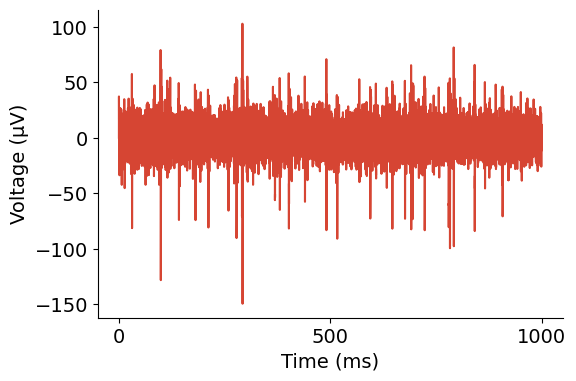

In [22]:
# set period
# get traces
Recording_sili = si.load_extractor(PREP_PATH_b)
traces_b = Recording_sili.get_traces()

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange(
    (ID_PERIOD_SILI - 1) * SFREQ_SILICO, ID_PERIOD_SILI * SFREQ_SILICO, 1
)
ax.plot(traces_b[one_sec_period, CHANNEL_IDS[0]], color=COLOR_B)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
# ax.set_box_aspect(1)
plt.xticks([0, SFREQ_SILICO / 2, SFREQ_SILICO])
ax.set_xticklabels([0, 500, 1000])

# save
os.makedirs("figures/2_realism/1_components/svg/buccino/", exist_ok=True)
plt.savefig("figures/2_realism/1_components/svg/buccino/buccino_components.svg")

### In vivo

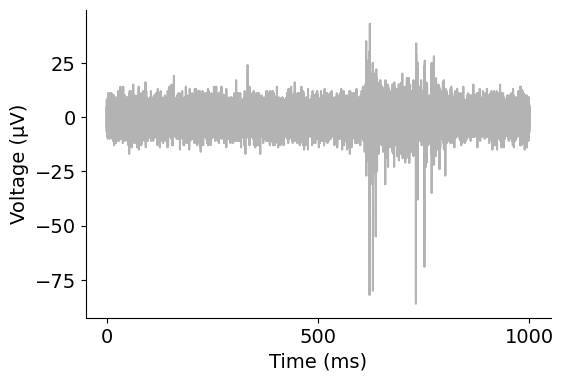

In [235]:
# get traces
Recording_vivo = si.load_extractor(PREP_PATH_vivo)
traces_vivo = Recording_vivo.get_traces()

# get a site in layer 5
layers_vivo = Recording_vivo.get_property("layers")
L5_site_vivo = np.where(layers_vivo == "L5")[0][L5_SITE_VIVO]

# plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# calculate one seconde period
one_sec_period = np.arange(
    (ID_PERIOD_VIVO - 1) * SFREQ_VIVO, ID_PERIOD_VIVO * SFREQ_VIVO, 1
)
ax.plot(traces_vivo[one_sec_period, L5_site_vivo], color=COLOR_VIVO)

# legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
# ax.set_box_aspect(1)
plt.xticks([0, SFREQ_VIVO / 2, SFREQ_VIVO])
ax.set_xticklabels([0, 500, 1000])

# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 